In [33]:
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

df = load_csv('AirQualityUCI.csv')

In [1341]:
df[:3]

[['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;'],
 ['10/03/2004;18.00.00;2',
  '6;1360;150;11',
  '9;1046;166;1056;113;1692;1268;13',
  '6;48',
  '9;0',
  '7578;;'],
 ['10/03/2004;19.00.00;2;1292;112;9',
  '4;955;103;1174;92;1559;972;13',
  '3;47',
  '7;0',
  '7255;;']]

return prettify row in list type

In [35]:
def row_from(dataset, index):
    return '.'.join(dataset[index]).split(';')

In [36]:
for i in range(3):
    print(row_from(df, i))

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', '', '']
['10/03/2004', '18.00.00', '2.6', '1360', '150', '11.9', '1046', '166', '1056', '113', '1692', '1268', '13.6', '48.9', '0.7578', '', '']
['10/03/2004', '19.00.00', '2', '1292', '112', '9.4', '955', '103', '1174', '92', '1559', '972', '13.3', '47.7', '0.7255', '', '']


I create a **dict** where the keys will be the columns

In [37]:
dict_col = {}
counter = 0
for el in df[0][0].split(';'):
    if len(el) > 0:
        dict_col[el] = []
dict_col

{'Date': [],
 'Time': [],
 'CO(GT)': [],
 'PT08.S1(CO)': [],
 'NMHC(GT)': [],
 'C6H6(GT)': [],
 'PT08.S2(NMHC)': [],
 'NOx(GT)': [],
 'PT08.S3(NOx)': [],
 'NO2(GT)': [],
 'PT08.S4(NO2)': [],
 'PT08.S5(O3)': [],
 'T': [],
 'RH': [],
 'AH': []}

and the values in the given key correspond to the values for the respective columns

In [38]:
for index, row in enumerate(df[1:]):
    for column, value in zip(dict_col, row_from(df[1:], index)[:-2]):
        dict_col[column].append(value)

first 5 values for each column

In [39]:
for key in dict_col:
    print(key, dict_col[key][:5])

Date ['10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004']
Time ['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00']
CO(GT) ['2.6', '2', '2.2', '2.2', '1.6']
PT08.S1(CO) ['1360', '1292', '1402', '1376', '1272']
NMHC(GT) ['150', '112', '88', '80', '51']
C6H6(GT) ['11.9', '9.4', '9.0', '9.2', '6.5']
PT08.S2(NMHC) ['1046', '955', '939', '948', '836']
NOx(GT) ['166', '103', '131', '172', '131']
PT08.S3(NOx) ['1056', '1174', '1140', '1092', '1205']
NO2(GT) ['113', '92', '114', '122', '116']
PT08.S4(NO2) ['1692', '1559', '1555', '1584', '1490']
PT08.S5(O3) ['1268', '972', '1074', '1203', '1110']
T ['13.6', '13.3', '11.9', '11.0', '11.2']
RH ['48.9', '47.7', '54.0', '60.0', '59.6']
AH ['0.7578', '0.7255', '0.7502', '0.7867', '0.7888']


I see that the values in the list are of the type str, so I change int to int and float to float accordingly

In [40]:
int_columns = ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
                            'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                            'PT08.S5(O3)']
float_column = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

In [41]:
def col_to_int(column, skipped):
    columns = []
    for i, item in enumerate(column):
        if len(item) >= 0 and item != '':
            columns.append(int(item))
        else:
            skipped.append(i) 
    return columns
    
def col_to_float(column, skipped):
    columns = []
    for i, item in enumerate(column):
        if len(item) >= 0 and item != '':
            columns.append(float(item))
        else:
            skipped.append(i) 
    return columns

In [42]:
skipped = []

for name in int_columns:
    dict_col[name] = col_to_int(dict_col[name], skipped)
    
for name in float_column:
    dict_col[name] = col_to_float(dict_col[name], skipped)

after conversion, also, I catch null rows(**skipped**), so I need to delete them from all columns

In [43]:
for key in dict_col.keys():
    print(key, dict_col[key][:5])

Date ['10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004', '10/03/2004']
Time ['18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00']
CO(GT) [2.6, 2.0, 2.2, 2.2, 1.6]
PT08.S1(CO) [1360, 1292, 1402, 1376, 1272]
NMHC(GT) [150, 112, 88, 80, 51]
C6H6(GT) [11.9, 9.4, 9.0, 9.2, 6.5]
PT08.S2(NMHC) [1046, 955, 939, 948, 836]
NOx(GT) [166, 103, 131, 172, 131]
PT08.S3(NOx) [1056, 1174, 1140, 1092, 1205]
NO2(GT) [113, 92, 114, 122, 116]
PT08.S4(NO2) [1692, 1559, 1555, 1584, 1490]
PT08.S5(O3) [1268, 972, 1074, 1203, 1110]
T [13.6, 13.3, 11.9, 11.0, 11.2]
RH [48.9, 47.7, 54.0, 60.0, 59.6]
AH [0.7578, 0.7255, 0.7502, 0.7867, 0.7888]


In [44]:
print("%-15s" %("Column"), "Rows")
print()
for column in dict_col:
    print("%-15s" %(column), len(dict_col[column]))

Column          Rows

Date            9471
Time            9471
CO(GT)          9357
PT08.S1(CO)     9357
NMHC(GT)        9357
C6H6(GT)        9357
PT08.S2(NMHC)   9357
NOx(GT)         9357
PT08.S3(NOx)    9357
NO2(GT)         9357
PT08.S4(NO2)    9357
PT08.S5(O3)     9357
T               9357
RH              9357
AH              9357


As we can see above, I should remove unnecessary indexes from two columns, namely **"Date"** and **"Time"**

In [45]:
len(skipped)

1482

there are many values here that repeat, but when I do set (skipped) a few values are omitted

In [46]:
for index in skipped:
    try:
        dict_col['Date'].pop(index)
    except Exception:
        pass
    
    try:
        dict_col['Time'].pop(index)
    except Exception:
        pass

In [47]:
print("%-15s" %("Column"), "Rows")
print()
for column in dict_col:
    print("%-15s" %(column), len(dict_col[column]))

Column          Rows

Date            9357
Time            9357
CO(GT)          9357
PT08.S1(CO)     9357
NMHC(GT)        9357
C6H6(GT)        9357
PT08.S2(NMHC)   9357
NOx(GT)         9357
PT08.S3(NOx)    9357
NO2(GT)         9357
PT08.S4(NO2)    9357
PT08.S5(O3)     9357
T               9357
RH              9357
AH              9357


as we can see above, finally we have an equal number of lines and can start working

now I have my data ready to go, so check the correlations between each column to rule them out unnecessary columns

I will start with 3 columns so that it would be easier for me to visualize the correlations and individual patterns such as mean and std.

In [1346]:
column_list = ['T', 'RH', 'AH']

In [1345]:
t = dict_col['T']
rh = dict_col['RH']
co = dict_col['CO(GT)']

In [50]:
def mean(values):
    return sum(values)/len(values)

In [51]:
print('mean', mean(t))
print('mean', mean(rh))
print('mean', mean(co))

mean 9.778305012290337
mean 39.48537992946447
mean -34.20752377898902


In [52]:
def std(values, mean):
    meter = sum([(val - mean)**2 for val in values])
    denominator = len(values) - 1
    return (meter / denominator) ** (1/2)

In [53]:
print('std', std(t, mean(t)))
print('std', std(rh, mean(rh)))
print('std', std(co, mean(co)))

std 43.20362306262309
std 51.2161449717661
std 77.65717034682939


In [54]:
def covariance(x, x_mean, y, y_mean):
    x1 = [x_val-x_mean for x_val in x]
    y1 = [y_val-y_mean for y_val in y]
    c2 = sum([x1_v * y1_v for x1_v, y1_v in zip(x1, y1)])
    val = (c2) * (1/(len(x)-1))
    return val

In [55]:
covariance(t, mean(t), rh, mean(rh))

1960.274612240891

In [56]:
def correlation(dataset_x, dataset_y):
    cor = covariance(dataset_x, mean(dataset_x), dataset_y, mean(dataset_y))
    std_val = std(dataset_x, mean(dataset_x)) * std(dataset_y, mean(dataset_y))
    return round(cor/std_val, 2)

In [57]:
correlation(t, rh)

0.89

In [58]:
# T, RH, AH 
def print_confusion_matrix(unique, matrix):
    print('------(A)' + '\t'.join(str(x) for x in unique))
    print('(P)')
    for i, x in enumerate(unique):
        print("%-7s| %s" % (x, '\t'.join(str(x) for x in matrix[i])))
    print()

In [1347]:
import numpy as np
import seaborn as sns
def confusion_matrix(list_use, dict_use):
    matrix = [[1 if col1==col2 else correlation(dict_use[col1], dict_use[col2]) \
                       for col1 in list_use] \
                       for col2 in list_use]
    print_confusion_matrix(list_use, matrix)

    corr = matrix
    mask = np.array([[i<=j for j in range(len(list_use))] \
                                            for i in range(len(list_use))])
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    _ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, 
                                  vmin=-1, center=0,annot=True,
                                  square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f',
                                  xticklabels=list_use, yticklabels=list_use)
    sns.set(rc={'figure.figsize':(15.7,8.27)})
    return matrix

------(A)T	RH	AH
(P)
T      | 1	0.89	0.98
RH     | 0.89	1	0.94
AH     | 0.98	0.94	1



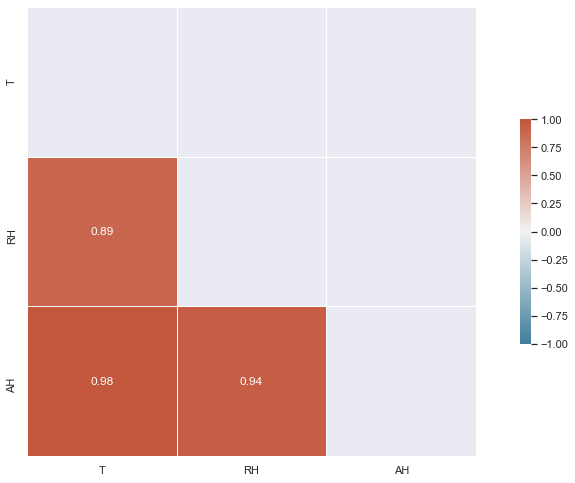

In [1348]:
_ = confusion_matrix(column_list, dict_col)

In [66]:
def mapping(col):
    dict_date = {}
    for i, value in enumerate(set(col)):
        dict_date[value] = i
        
    for i, element in enumerate(col):
        col[i] = dict_date[element]

In [67]:
mapping(dict_col['Date'])
mapping(dict_col['Time'])

In [1343]:
for key in dict_col.keys():
    print(key, dict_col[key][:5])

Date [6, 6, 6, 6, 6]
Time [12, 2, 21, 1, 4]
CO(GT) [2.6, 2.0, 2.2, 2.2, 1.6]
PT08.S1(CO) [1360, 1292, 1402, 1376, 1272]
NMHC(GT) [150, 112, 88, 80, 51]
C6H6(GT) [11.9, 9.4, 9.0, 9.2, 6.5]
PT08.S2(NMHC) [1046, 955, 939, 948, 836]
NOx(GT) [166, 103, 131, 172, 131]
PT08.S3(NOx) [1056, 1174, 1140, 1092, 1205]
NO2(GT) [113, 92, 114, 122, 116]
PT08.S4(NO2) [1692, 1559, 1555, 1584, 1490]
PT08.S5(O3) [1268, 972, 1074, 1203, 1110]
T [13.6, 13.3, 11.9, 11.0, 11.2]
RH [48.9, 47.7, 54.0, 60.0, 59.6]
AH [0.7578, 0.7255, 0.7502, 0.7867, 0.7888]


everything is displayed properly so I'll go to all columns

In [1344]:
column_list = [col for col in dict_col.keys()]
column_list

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

the date and time columns are of the type str, so I'm going to map these strings to numeric values

------(A)Date	Time	CO(GT)	PT08.S1(CO)	NMHC(GT)	C6H6(GT)	PT08.S2(NMHC)	NOx(GT)	PT08.S3(NOx)	NO2(GT)	PT08.S4(NO2)	PT08.S5(O3)	T	RH	AH
(P)
Date   | 1	0.0	-0.07	-0.03	-0.02	-0.05	-0.02	-0.06	-0.05	-0.07	-0.01	-0.02	-0.05	-0.06	-0.06
Time   | 0.0	1	0.03	-0.04	-0.02	-0.02	-0.07	-0.08	0.03	-0.09	-0.05	-0.02	-0.02	0.02	-0.01
CO(GT) | -0.07	0.03	1	0.04	0.13	-0.03	0.03	0.53	-0.09	0.67	-0.07	0.08	-0.07	-0.05	-0.05
PT08.S1(CO)| -0.03	-0.04	0.04	1	0.17	0.85	0.93	0.28	0.09	0.15	0.85	0.89	0.75	0.75	0.76
NMHC(GT)| -0.02	-0.02	0.13	0.17	1	0.04	0.11	-0.0	0.05	0.1	0.16	0.1	-0.0	0.01	0.01
C6H6(GT)| -0.05	-0.02	-0.03	0.85	0.04	1	0.77	-0.0	0.51	-0.01	0.77	0.64	0.97	0.93	0.98
PT08.S2(NMHC)| -0.02	-0.07	0.03	0.93	0.11	0.77	1	0.33	-0.07	0.18	0.87	0.91	0.67	0.59	0.65
NOx(GT)| -0.06	-0.08	0.53	0.28	-0.0	-0.0	0.33	1	-0.44	0.82	0.04	0.46	-0.14	-0.05	-0.1
PT08.S3(NOx)| -0.05	0.03	-0.09	0.09	0.05	0.51	-0.07	-0.44	1	-0.26	0.12	-0.21	0.59	0.57	0.62
NO2(GT)| -0.07	-0.09	0.67	0.15	0.1	-0.01	0.18	0.82	-0.26	1	-0.02	0.25	

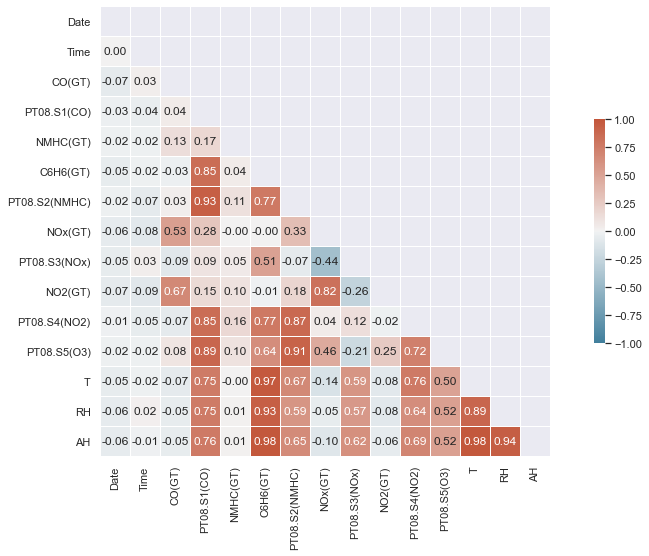

In [77]:
matrix = confusion_matrix(column_list, dict_col)

as we can see the above confusion matrix provides us with a lot of information, so we can distinguish several things right away column `PT08.S1(CO)` has a strong correlation with columns such as `C6H6(GT), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3), RH, AH, NO2 (GT), 'NOx (GT)` so I'm going to throw them out of our analysis

In [1350]:
dict_new = dict_col.copy()
throw = ['C6H6(GT)', 'PT08.S2(NMHC)',
                'PT08.S4(NO2)', 'PT08.S5(O3)', 
                'RH', 'AH', 'NOx(GT)', 'NO2(GT)']

In [1351]:
for delet in throw:
    del dict_new[delet]

In [1352]:
columns = dict_new.keys()
columns

dict_keys(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S3(NOx)', 'T'])

------(A)Date	Time	CO(GT)	PT08.S1(CO)	NMHC(GT)	PT08.S3(NOx)	T
(P)
Date   | 1	0.0	-0.07	-0.03	-0.02	-0.05	-0.05
Time   | 0.0	1	0.03	-0.04	-0.02	0.03	-0.02
CO(GT) | -0.07	0.03	1	0.04	0.13	-0.09	-0.07
PT08.S1(CO)| -0.03	-0.04	0.04	1	0.17	0.09	0.75
NMHC(GT)| -0.02	-0.02	0.13	0.17	1	0.05	-0.0
PT08.S3(NOx)| -0.05	0.03	-0.09	0.09	0.05	1	0.59
T      | -0.05	-0.02	-0.07	0.75	-0.0	0.59	1



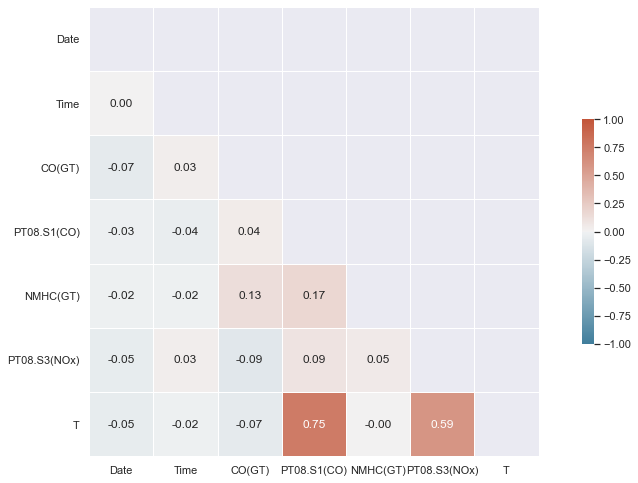

In [82]:
matrix = confusion_matrix(columns, dict_new)

as we can see it is much better and we will now be able to use the appropriate model to train our algorithm

In [1353]:
X = dict_new
y = dict_new['T'].copy()
del X['T']

In [1354]:
X.keys()

dict_keys(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S3(NOx)'])

In [1357]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [1358]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        #multi = multiply_matrix(X, w) 
        #b = [[0 for x in _] for _ in multi] 
        #z = multi + b
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        #weight_gradient = multiply_matrix(transpose(X), loss) / m
        weight_gradient = X.T.dot(loss) / m
        
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [1359]:
def predict(X, w, b):
    #return multiply_matrix(X, w) + b
    return X.dot(w) + b

In [1365]:
import pandas as pd

In [1369]:
X_pd = pd.DataFrame(X)
X_pd

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S3(NOx)
0,6,12,2.6,1360,150,1056
1,6,2,2.0,1292,112,1174
2,6,21,2.2,1402,88,1140
3,6,1,2.2,1376,80,1092
4,6,4,1.6,1272,51,1205
...,...,...,...,...,...,...
9352,251,18,3.1,1314,-200,539
9353,251,16,2.4,1163,-200,604
9354,251,3,2.4,1142,-200,603
9355,251,14,2.1,1003,-200,702


In [1371]:
# Scaling the dataset to fit the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_pd)
#X = [(val-mean_xsc)/ std_xsc for val in X_sc]

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [1373]:
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0
weights, bias, costs = gradient_descent_function(X_train, y_train, w, b, epochs=2500);

print(weights)
print(bias)

[ 0.19686425  0.53269825 -1.36949678 31.69162864 -6.20270985 22.97195009]
9.840472244141887


In [1376]:
def predict(X, w, b):
    return X.dot(w) + b
def r2score(y_pred, y):
    """
    Parameters:
    y_pred: predicted values
    y: actual values
    
    Returns:
    r2: r2 score
    """
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
# Predicted values with our model
y_pred = predict(X_test, weights, bias)

In [1378]:
r2 = r2score(y_pred, np.array(y_test))
print(r2)

0.8621477551014993


Text(0.5, 1.0, 'e')

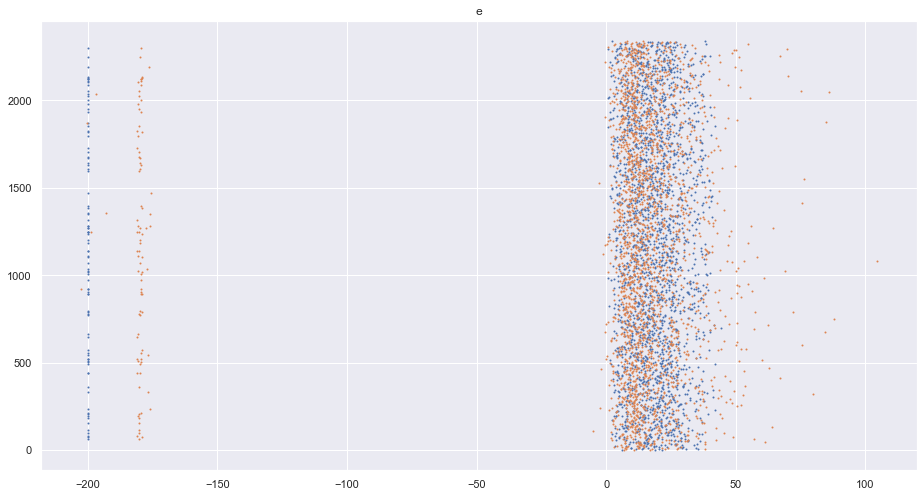

In [1393]:
plt.scatter(y_test, np.arange(len(y_test)), s=1)
plt.scatter(y_pred, np.arange(len(y_pred)), s=1)
plt.title('Multiple linear regression raw method')

plt.show()

In [1374]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8621477551093233

In [1390]:
y_pred_linear = reg.predict(X_test)

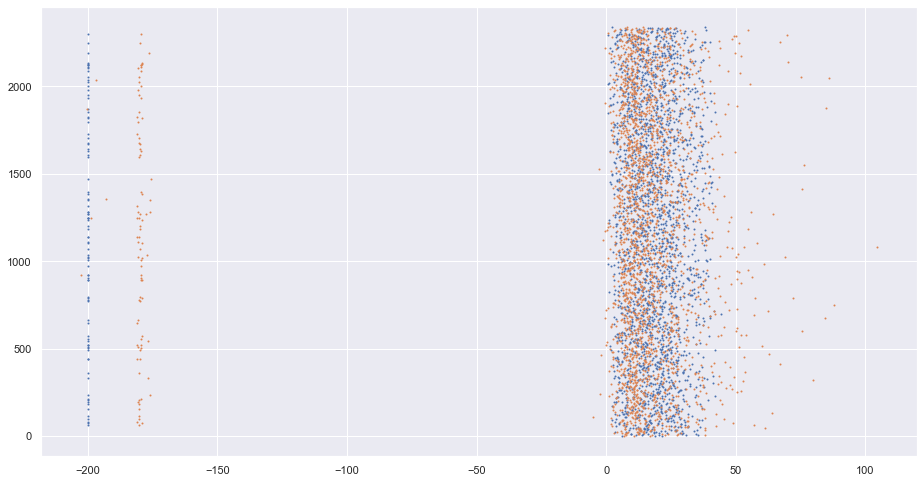

In [1392]:
plt.scatter(y_test, np.arange(len(y_test)), s=1)
plt.scatter(y_pred_linear, np.arange(len(y_pred_linear)), s=1)